<p style="text-align: justify; text-justify: inter-word;">
   <font size=3>
       The purpose of this demo project is cluster instances into two groups namely <b>private</b> and <b>public university</b>.
       We will use a data frame with 777 observations on the following 18 variables.
       <ul>
          <li>Private: A factor with levels No and Yes indicating private or public university</li>
          <li>Apps: Number of applications received</li>
          <li>Accept: Number of applications accepted</li>
          <li>Enroll: Number of new students enrolled</li>
          <li>Top10perc: Pct. new students from top 10% of H.S. class</li>
          <li>Top25perc: Pct. new students from top 25% of H.S. class</li>
          <li>F.Undergrad: Number of fulltime undergraduates</li>
          <li>P.Undergrad: Number of parttime undergraduates</li>
          <li>Outstate: Out-of-state tuition is the tuition rate that
              students pay when attending a public college or university 
              outside of their state of residence. It's also sometimes
              called "nonresident tuition". 
          </li>
          <li>Room.Board: Room and board costs</li>
          <li>Books: Estimated book costs</li>
          <li>Personal: Estimated personal spending</li>
          <li>PhD: Pct. of faculty with Ph.D.’s</li>
          <li>Terminal: Pct. of faculty with terminal degree</li>
          <li>S.F.Ratio: Student/faculty ratio</li>
          <li>perc.alumni: Pct. alumni who donate</li>
          <li>Expend: Instructional expenditure per student</li>
          <li>Grad.Rate: Graduation rate</li>
        </ul>
   </font>
</p>

### <span style="color:#3C4048; font-weight: bold; font-size: 18px; font-family: Gill Sans, sans-serif;">Importing Required Packages</span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### <span style="color:#3C4048; font-weight: bold; font-size: 18px; font-family: Gill Sans, sans-serif;">Data Ingestion</span>

In [2]:
df = pd.read_csv("data/College_Data", index_col=0)
df.sample(4)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
St. Lawrence University,Yes,2753,1820,505,31,56,1801,45,18720,5730,650,825,90,94,11.5,38,14980,85
Marymount College Tarrytown,Yes,478,327,117,9,34,731,370,11510,6450,575,1075,71,93,10.3,30,10502,77
University of Alabama at Birmingham,No,1797,1260,938,24,35,6960,4698,4440,5175,750,2200,96,96,6.7,16,16352,33
Valley City State University,No,368,344,212,5,27,863,189,4286,2570,600,2000,39,41,14.9,25,4958,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

### <span style="color:#3C4048; font-weight: bold; font-size: 18px; font-family: Gill Sans, sans-serif;">Data Analysis</span>

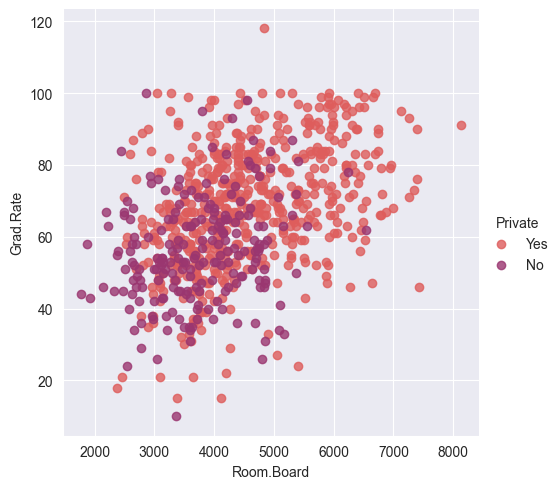

In [4]:
# Graph between "room and board cost" and "Graduation Rate"
sns.set_style("darkgrid")
sns.lmplot(x="Room.Board", 
           y="Grad.Rate", 
           data=df, 
           hue="Private", 
           fit_reg=False,  # It disable the gradient line
           palette="flare",
           aspect=1)

<p style="text-align: justify; text-justify: inter-word;">
   <font size=3>
       It is seem like most of the private colleges has high Room and Board cost
   </font>
</p>

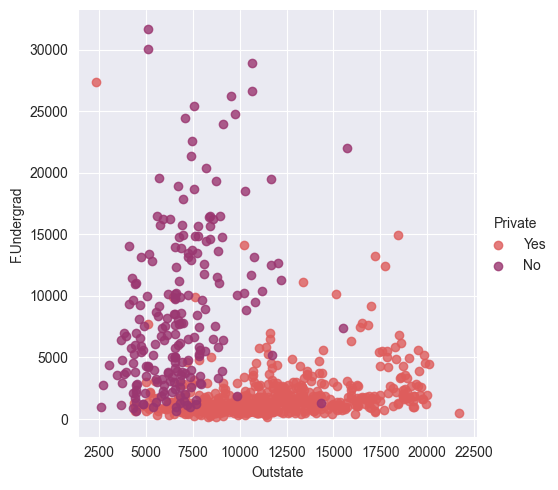

In [5]:
sns.lmplot(x="Outstate", 
           y="F.Undergrad", 
           data=df, 
           hue="Private", 
           fit_reg=False, 
           palette="flare",
           aspect=1)

<p style="text-align: justify; text-justify: inter-word;">
   <font size=3>
      Most of the Full Time Undergraduates paid less out-of-state tution fees and most of
      them belong public colleages.
   </font>
</p>

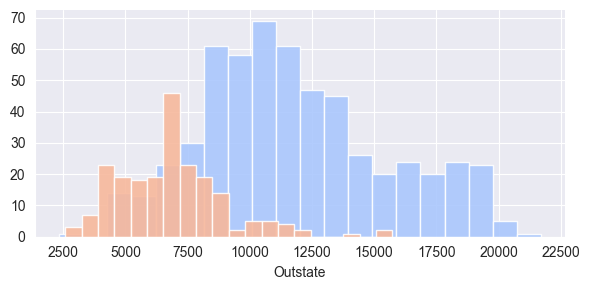

In [14]:
# Creating a stacked histogram showing out-of-state Tuition fee based on the Private column.
g = sns.FacetGrid(df, hue="Private", palette="coolwarm", aspect=2)
g = g.map(plt.hist, 'Outstate', bins=20, alpha=0.9)

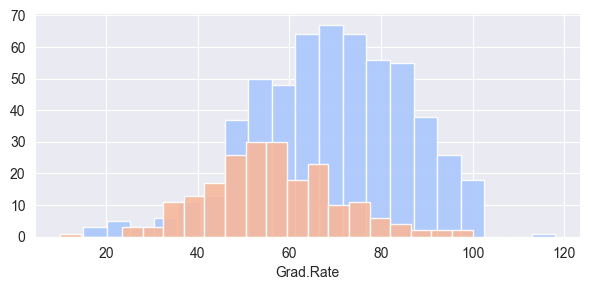

In [15]:
# Similar to above graph, ploting histogram for "Grad.Rate"
g = sns.FacetGrid(df, hue="Private", palette="coolwarm", aspect=2)
g = g.map(plt.hist, 'Grad.Rate', bins=20, alpha=0.9)

In [16]:
# Graduation rate should be within 100 percentage but it seem one college has
# 120 percentage. We will are going to replace it with 100%
df[df["Grad.Rate"] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [21]:
df["Grad.Rate"]['Cazenovia College'] = 100

C:\Users\madhubabukencha\AppData\Local\Temp\ipykernel_13848\3028159487.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Grad.Rate"]['Cazenovia College'] = 100


In [22]:
df[df["Grad.Rate"] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


### <span style="color:#3C4048; font-weight: bold; font-size: 18px; font-family: Gill Sans, sans-serif;">K Mean Cluster Creation</span>